In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')

In [3]:
X = data[['Horsepower', 'Turn.circle']]
Y = data['Price'].values.reshape(-1,1)

In [4]:
import sklearn.model_selection

In [5]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

In [7]:
X_train

,Horsepower,Turn.circle
72,74,35
29,214,40
77,140,37
1,200,38
24,100,39
25,142,42
44,124,36
65,151,41
9,200,43
73,110,39


In [6]:
linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, Y_train)
beta0 = linear.intercept_[0]
beta1 = linear.coef_[0][0]
beta2 = linear.coef_[0][0]
r2_train = linear.score(X_train, Y_train)
r2_validation = linear.score(X_validation, Y_validation) 
print('betas:', beta0, beta1, beta2)
print('R2 (train vs. validation)', r2_train, r2_validation)

betas: -0.045803473405136685 0.1507556772138677 0.1507556772138677
R2 (train vs. validation) 0.721727300270402 0.5305036808981523


In [7]:
for i in range(10):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta0 = linear.intercept_[0]
    beta1 = linear.coef_[0][0]
    beta2 = linear.coef_[0][0]
    r2_train = linear.score(X_train, Y_train)
    r2_validation = linear.score(X_validation, Y_validation) 
    print('ITERACION ', i)
    print('\t betas:', beta0, beta1, beta2)
    print('\t R2 (train vs. validation)', r2_train, r2_validation)

ITERACION  0
	 betas: 16.428226410851995 0.19047832953437938 0.19047832953437938
	 R2 (train vs. validation) 0.5862096476588852 0.5892528916882379
ITERACION  1
	 betas: 1.804801656368003 0.14277353952910588 0.14277353952910588
	 R2 (train vs. validation) 0.5676428659040893 0.6967566136176397
ITERACION  2
	 betas: -9.399136207156996 0.13427307647413236 0.13427307647413236
	 R2 (train vs. validation) 0.6500901156046766 0.5505366525428785
ITERACION  3
	 betas: 5.51547982803956 0.1692505532908896 0.1692505532908896
	 R2 (train vs. validation) 0.6835188692974896 0.5715354580197818
ITERACION  4
	 betas: 9.463761681024351 0.19582047604278197 0.19582047604278197
	 R2 (train vs. validation) 0.5948510852578038 0.5580014748510473
ITERACION  5
	 betas: -9.473900739206044 0.13524528730160615 0.13524528730160615
	 R2 (train vs. validation) 0.6872311913714874 0.5645563583077617
ITERACION  6
	 betas: 11.218149940944572 0.15780907635071947 0.15780907635071947
	 R2 (train vs. validation) 0.4876175832319

In [8]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation)

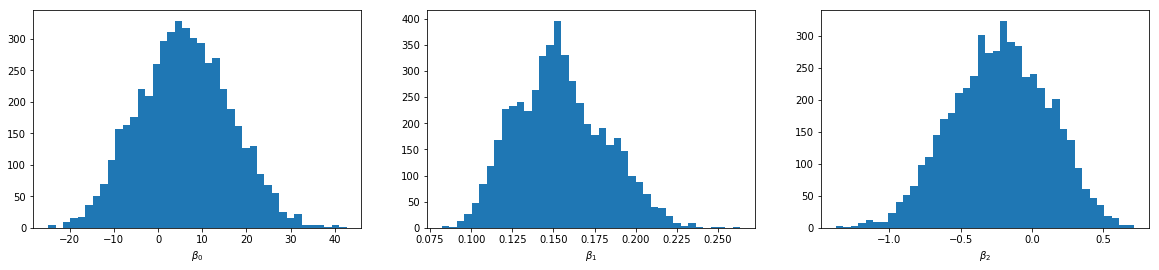

In [9]:
plt.figure(figsize=(20,4))

plt.subplot(131)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(132)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(133)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')

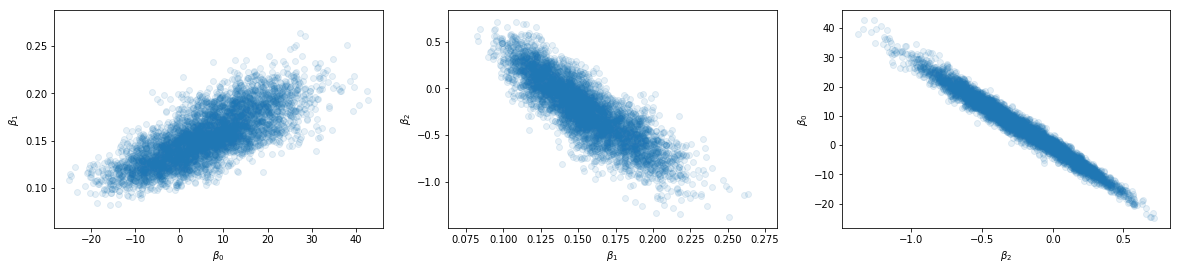

In [10]:
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.scatter(beta_0, beta_1, alpha=0.1)
_ = plt.xlabel(r'$\beta_0$')
_ = plt.ylabel(r'$\beta_1$')

plt.subplot(132)
plt.scatter(beta_1, beta_2, alpha=0.1)
_ = plt.xlabel(r'$\beta_1$')
_ = plt.ylabel(r'$\beta_2$')

plt.subplot(133)
plt.scatter(beta_2, beta_0, alpha=0.1)
_ = plt.xlabel(r'$\beta_2$')
_ = plt.ylabel(r'$\beta_0$')

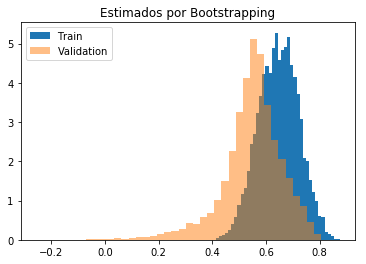

In [11]:
_ = plt.hist(r2_train, bins=40, density=True, label='Train')
_ = plt.hist(r2_validation, bins=40, alpha=0.5, density=True, label='Validation')

plt.title("Estimados por Bootstrapping")
plt.legend()

In [12]:
print('beta 0 {} +/- {}'.format(beta_0.mean(), beta_0.std() ))
print('beta 1 {} +/- {}'.format(beta_1.mean(), beta_1.std() ))
print('beta 2 {} +/- {}'.format(beta_2.mean(), beta_2.std() ))

beta 0 6.028495359093394 +/- 10.350376373548231
beta 1 0.15412032340117543 +/- 0.027313604037444844
beta 2 -0.22303116978747953 +/- 0.3378897612757095


## Ejercicio 7.1

Haga un ejercicio de bootstrap sobre el modelo lineal con variables Horsepower, Turn.circle y MPG.highway para estimar los valores medios e incertidumbres. ¿Cuáles de los betas correspondientes son consistentes con cero?


In [13]:
X = data[['Horsepower', 'Turn.circle','MPG.highway']]
Y = data['Price'].values.reshape(-1,1)

In [14]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

In [15]:
linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, Y_train)
beta0 = linear.intercept_[0]
beta1 = linear.coef_[0][0]
beta2 = linear.coef_[0][0]
beta3 = linear.coef_[0][0]
r2_train = linear.score(X_train, Y_train)
r2_validation = linear.score(X_validation, Y_validation) 
print('betas:', beta0, beta1, beta2, beta3)
print('R2 (train vs. validation)', r2_train, r2_validation)

betas: 31.6896435336592 0.14749797946248883 0.14749797946248883 0.14749797946248883
R2 (train vs. validation) 0.6373573981928222 0.6000770742118477


In [16]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
beta_3 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    beta_3[i] = linear.coef_[0][2]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation)

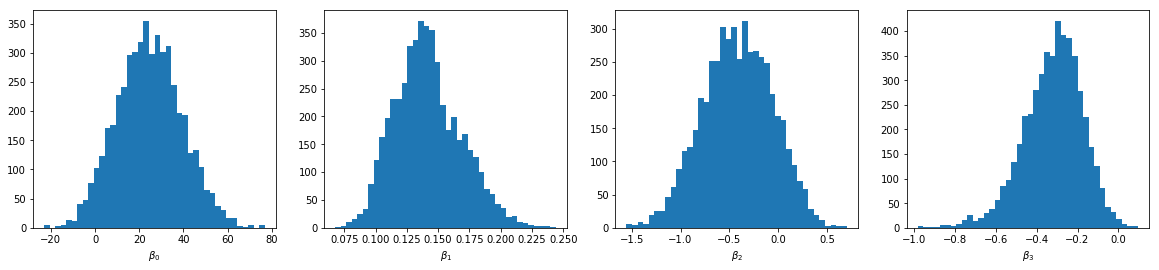

In [17]:
plt.figure(figsize=(20,4))

plt.subplot(141)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(142)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(143)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')

plt.subplot(144)
_ = plt.hist(beta_3, bins=40)
_ = plt.xlabel(r'$\beta_3$')

In [63]:
print (np.mean(beta_0))
print (np.mean(beta_1))
print (np.mean(beta_2))
print (np.mean(beta_3))
print (np.std(beta_0))
print (np.std(beta_1))
print (np.std(beta_2))
print (np.std(beta_3))

24.588484073766512
0.14180409662026605
-0.41450184104834586
-0.32032814729564224
14.677385335595773
0.026686023886860075
0.35929183838099177
0.14370952330084102


Viendo estas desviaciones, se debería aceptar solo el parametro beta_1

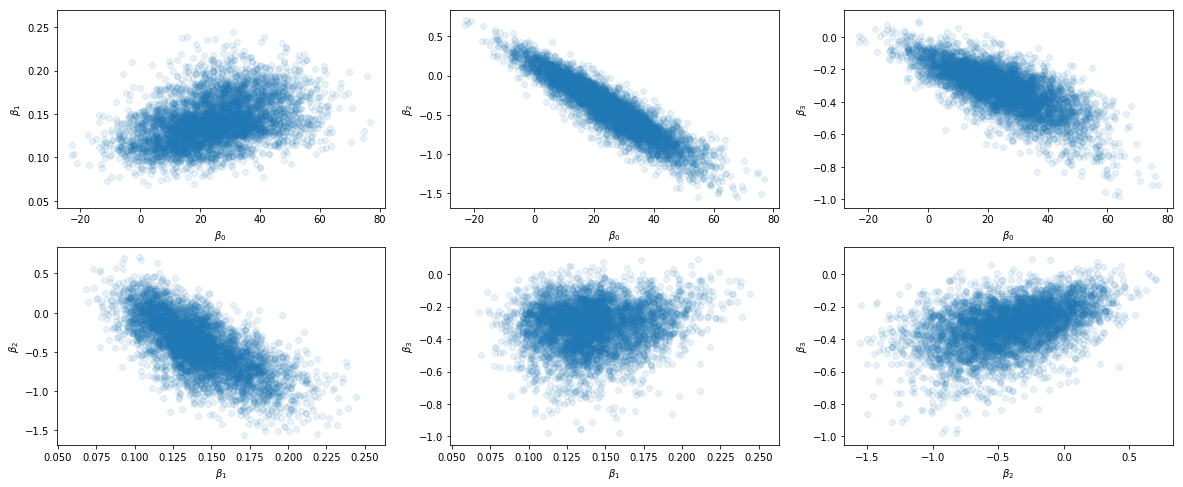

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(231)
plt.scatter(beta_0, beta_1, alpha=0.1)
_ = plt.xlabel(r'$\beta_0$')
_ = plt.ylabel(r'$\beta_1$')

plt.subplot(232)
plt.scatter(beta_0, beta_2, alpha=0.1)
_ = plt.xlabel(r'$\beta_0$')
_ = plt.ylabel(r'$\beta_2$')

plt.subplot(233)
plt.scatter(beta_0, beta_3, alpha=0.1)
_ = plt.xlabel(r'$\beta_0$')
_ = plt.ylabel(r'$\beta_3$')

plt.subplot(234)
plt.scatter(beta_1, beta_2, alpha=0.1)
_ = plt.xlabel(r'$\beta_1$')
_ = plt.ylabel(r'$\beta_2$')

plt.subplot(235)
plt.scatter(beta_1, beta_3, alpha=0.1)
_ = plt.xlabel(r'$\beta_1$')
_ = plt.ylabel(r'$\beta_3$')

plt.subplot(236)
plt.scatter(beta_2, beta_3, alpha=0.1)
_ = plt.xlabel(r'$\beta_2$')
_ = plt.ylabel(r'$\beta_3$')



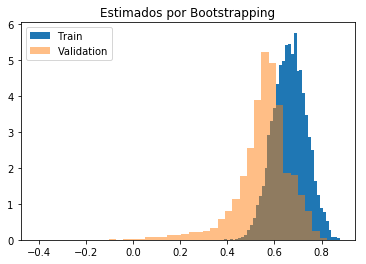

In [20]:
_ = plt.hist(r2_train, bins=40, density=True, label='Train')
_ = plt.hist(r2_validation, bins=40, alpha=0.5, density=True, label='Validation')

plt.title("Estimados por Bootstrapping")
plt.legend()

## Ejercicio 7.2

Para el mismo modelo lineal con variables Horsepower, Turn.circle y MPG.highway utilice MCMC para encontrar P(beta|datos). ¿Cómo se relacionan las distribuciones de los beta encontrados con bootstraping y con MCMC? ¿Cómo se relacionan los valores medios y las incertidumbres?


In [105]:
x_obs= np.array(data[['Horsepower', 'Turn.circle','MPG.highway']])
y_obs= np.array(data['Price'].values.reshape(-1,1))
sigma_y_obs = np.std(y_obs)

In [106]:
def model(x_obs, param):
    y_model = param[1]*x_obs + param[2]*x_obs + param[3]*x_obs + param[0]
    return y_model

def loglikelihood(x_obs,sigma_y_obs, param):
    d = x -  model(x_obs, param)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    d = np.log(d)
    return d


def logprior(param):
    p = -np.inf
    if param[0] > 0 and param[0] <30 and param[1]>0 and param[1]<1 and  param[2]>-1 and param[2]<0 and  param[3]>-1 and param[3]<0:
        p = 0.0
    return p

In [107]:
def metropolis(x_obs, y_obs,sigma_y_obs, N = 50000):
    l_param = [np.array([24, 0.1,-0.4,-0.3])]
    sigma_param = np.array([1,1, 1,1])
    n_param = len(sigma_param)
    logposterior = [0]
    for i in range(1,N):
        propuesta  = l_param[i-1] + np.random.normal(size=n_param)*sigma_param
        #print(propuesta)
        logposterior_viejo = loglikelihood(x_obs, y_obs, l_param[i-1]) + logprior(l_param[i-1])
        logposterior_nuevo = loglikelihood(x_obs, y_obs, propuesta) + logprior(propuesta)

        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            l_param.append(propuesta)
            logposterior.append(logposterior_nuevo)
        else:
            l_param.append(l_param[i-1])
            logposterior.append(logposterior_viejo)
    
    l_param = np.array(l_param)
    l_param = l_param[N//10:,:] # descartamos el primer 10% de la cadena
    logposterior = np.array(logposterior)
    logposterior = logposterior[N//10:]
    return l_param, logposterior

In [108]:
param, posterior = metropolis(x_obs,y_obs,sigma_y_obs)

C:\Users\Beatriz\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


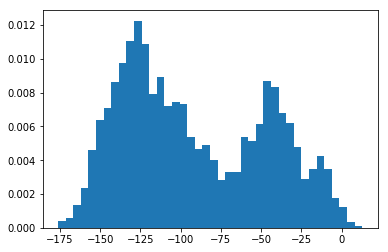

In [112]:
_=plt.hist(param[:,0], bins=40,density=True)

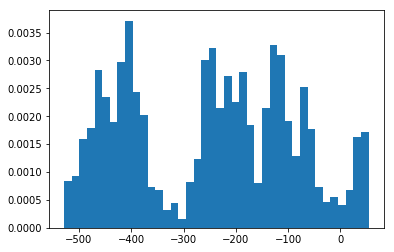

In [113]:
_=plt.hist(param[:,1], bins=40,density=True)

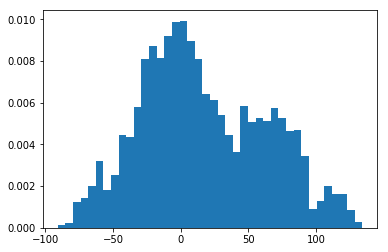

In [114]:
_=plt.hist(param[:,2], bins=40,density=True)

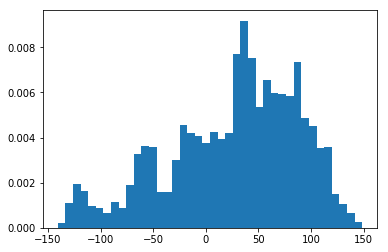

In [115]:
_=plt.hist(param[:,3], bins=40,density=True)

In [117]:
print (np.mean(param[:,0]))
print (np.mean(param[:,1]))
print (np.mean(param[:,2]))
print (np.mean(param[:,3]))
print (np.std(param[:,0]))
print (np.std(param[:,1]))
print (np.std(param[:,2]))
print (np.std(param[:,3]))

-91.27529829804317
-249.91437990088724
16.916651681311787
26.6201404011581
44.50262598187476
157.50231581170735
46.150834814622485
61.98261742828285
